In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
df = pd.read_table("../Saidas/Teste7/info_parimpar.txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
#df.reset_index().set_index('index', drop=False)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,RegrasBloqueadas,BytesEnviados,Medicao
0,20,HW,47,250,1342,76697712,1
1,20,SW,131,977,0,180801936,1
2,35,HW,54,470,2244,282405312,2
3,35,SW,216,1855,0,950358528,2
4,50,HW,100,676,2446,738651312,3
5,51,SW,260,2186,0,2389017456,3
6,65,HW,131,838,2446,1497242880,4
7,67,SW,260,2425,0,4449421368,4
8,80,HW,156,977,2464,2519241480,5
9,81,SW,259,2550,0,7013094480,5


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

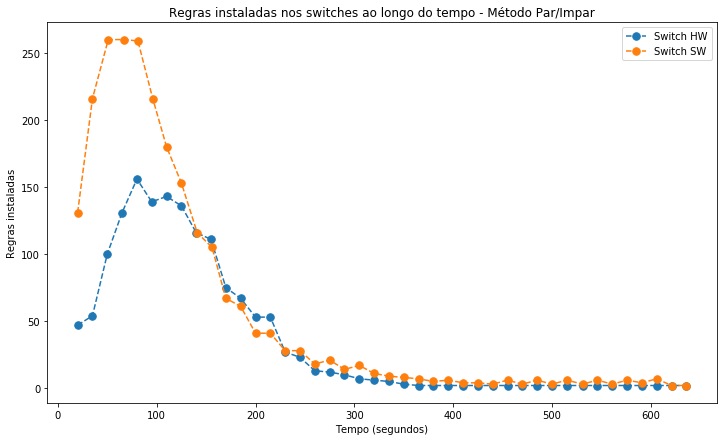

In [5]:
#Agrupando por switch
groups = df.groupby (['Switch'])
#for key,item in gpb:
    #print(gpb.get_group(key), "\n\n")

# Plot
fig, ax = plt.subplots(figsize = (12,7))
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Tempo, group.RegrasInstaladas, marker='.', linestyle='--', ms=15, label="Switch "+name, alpha=1)
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
plt.title(u"Regras instaladas nos switches ao longo do tempo - Método Par/Impar") #u = unicode
ax.legend()
plt.savefig('regrasInstaladas_Tempo_parimpar.pdf')
plt.show()